In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

## import data

In [19]:
%%time
input_data=[]
output_data=[]
test_data=[]
x_test_label=[]
for dirpath, dirnames, filenames in os.walk('./stage1_train'):
    if dirpath[-6:]=='images':
        #print(dirpath)
        input_data.append(dirpath+"/"+filenames[0])
    if dirpath[-5:]=='masks':
        for item in filenames:
            filenames[filenames.index(item)]=dirpath+"/"+item
        output_data.append(filenames)
#len(dirpath)
for dirpath, dirnames, filenames in os.walk('./stage1_test'):
    if dirpath[-6:]=='images':
        test_data.append(dirpath+"/"+filenames[0])
        x_test_label.append(filenames[0][:-4])

CPU times: user 85.3 ms, sys: 69.9 ms, total: 155 ms
Wall time: 156 ms


In [3]:
%%time
x_train=[]
for path in input_data:
    img=mpimg.imread(path)
    x_train.append(img)
    #plt.imshow(img[:,:,1])

CPU times: user 8.24 s, sys: 489 ms, total: 8.73 s
Wall time: 8.79 s


In [4]:
%%time
y_train=[]
for ans in output_data:
    tmp=0
    for i in (ans):
        img=mpimg.imread(i)
        tmp+=img
    #plt.imshow(tmp)
    y_train.append(tmp)

CPU times: user 1min 44s, sys: 7.23 s, total: 1min 52s
Wall time: 1min 53s


In [9]:
%%time
x_test=[]
x_test_label=[]
for path in test_data:
    img=mpimg.imread(path)
    x_test.append(img)
    #plt.imshow(img[:,:,1])

CPU times: user 910 ms, sys: 43.8 ms, total: 954 ms
Wall time: 961 ms


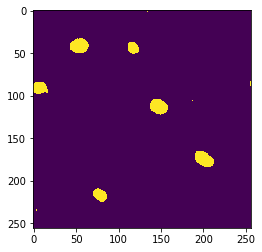

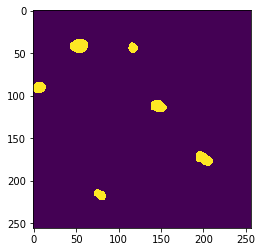

In [10]:
index=11
test=x_train[index]
test*=100
test=np.where(test >test.mean()-0.5*test.std(), 1, 0)
plt.imshow(test[:,:,0])
plt.show()
test=y_train[index]
plt.imshow(test)

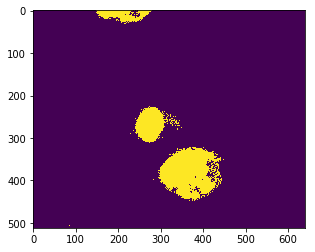

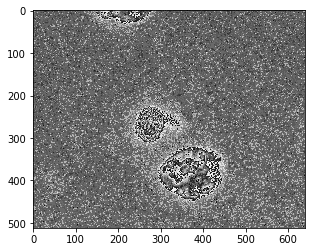

In [21]:
index=10
test=x_test[index]
test*=100
test=np.where(test >test.mean()-0.5*test.std(), 1, 0)
plt.imshow(test[:,:,0])
plt.show()
test=x_test[index]
plt.imshow(test)

In [13]:
ans=[]
for i in range(len(x_test)):
    test=x_test[i]
    test*=100
    test=np.where(test >test.mean()-0.5*test.std(), 1, 0)

    res=test[:,:,0].reshape(-1)
    #res=[0, 1, 1, 1, 0, 0, 0, 1, 1, 0]
    count=0
    tmp_index=0
    result=[]
    for index,item in enumerate(res):
        if item==0:
            if index==tmp_index:
                #print(count,tmp_index)
                tmp_index=index+1
            else:
                result.append(tmp_index+1)
                result.append(count)
                count=0
                tmp_index=index+1
        else:
            count=count+1
    temp=''
    for item in result:
        temp=temp+str(item)+' '
    ans.append(temp)

In [20]:
target={'ImageId':x_test_label,'EncodedPixels':ans}
df=pd.DataFrame(target)
df = df[['ImageId', 'EncodedPixels']]
df.to_csv('answer.csv',index=False)